In [ ]:
import gym
import gym2048
import pickle
import matplotlib.pyplot as plt
import math
import torch
from numpy import argmax
import numpy as np
%matplotlib inline

with open('./model/2023_02_27/fitness.pickle', 'rb') as f:
    fitness = pickle.load(f)
with open('./model/2023_02_27/generation_399.pickle', 'rb') as f:
    pop = pickle.load(f)

print(pop.best_individual['fitness'])
print(fitness[argmax(fitness)])

In [2]:
def plt_avg_fitness(fitness, avg_len=10):
    tmp = fitness.copy()
    avg_fitness = []
    if avg_len == 1:
        avg_fitness = tmp
    else:
        for i in range(0, len(fitness), avg_len):
            avg_fitness.append(math.fsum(tmp[i:min(i+avg_len, len(fitness)-1)]) / len(tmp[i:min(i+avg_len, len(fitness)-1)]))
    plt.plot(range(0, len(fitness), avg_len), avg_fitness)
    plt.title('Population fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.show()

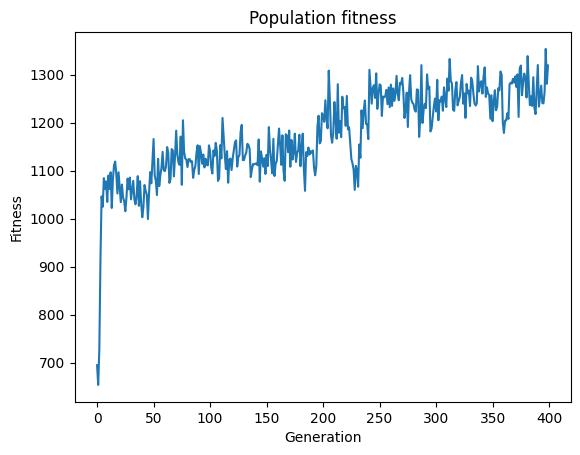

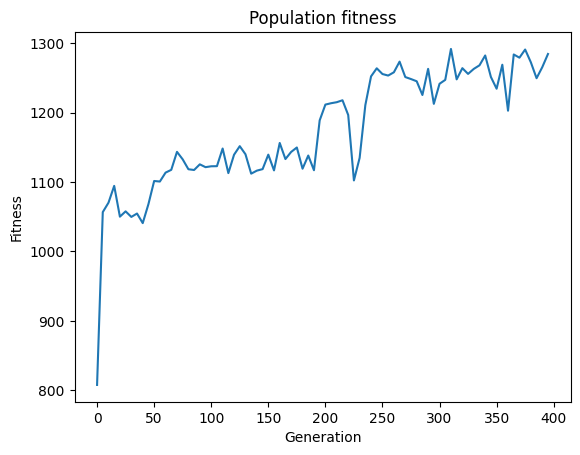

In [3]:
plt_avg_fitness(fitness, 1)
plt_avg_fitness(fitness, 5)

In [30]:
'''
單次測試(會渲染視窗)
'''
with gym.make('gym2048-v0', disable_env_checker=True, render_mode='human') as env:
    best_individual = pop.best_individual
    model = pop.model
    done = False
    obs, _ = env.reset()
    while not done:
        state = torch.from_numpy(obs).float()
        action = torch.distributions.Categorical(probs=model(state, best_individual['params'])).sample().item()
        obs, reward, done, _, info = env.step(action)

....................................................................................................6
512
Avg score: 213.76
Socre std: 136.6576101064262


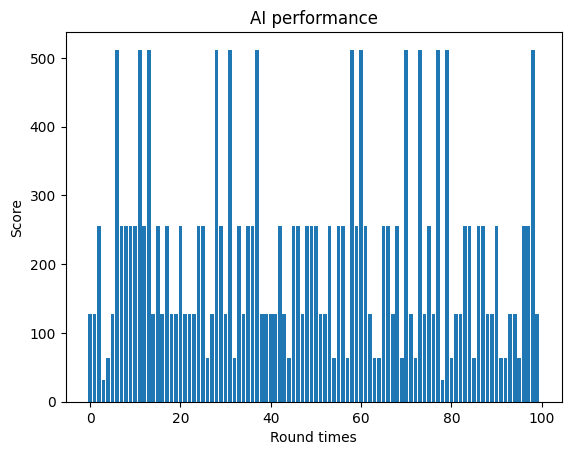

In [7]:
'''
多次測試(無視窗)
'''
eval_times = 100
score = []
with gym.make('gym2048-v0', disable_env_checker=True, render_mode=None) as env:
    best_individual = pop.best_individual
    model = pop.model
    for i in range(eval_times):
        print('.', end='')
        done = False
        obs, _ = env.reset()
        while not done:
            state = torch.from_numpy(obs).float()
            action = torch.distributions.Categorical(probs=model(state, best_individual['params'])).sample().item()
            obs, reward, done, _, info = env.step(action)
        score.append(info['max_value'])
print()
print('Max value', score[argmax(score)])

avg_len = 1
tmp = score.copy()
avg_fitness = []
if avg_len == 1:
    avg_fitness = tmp
else:
    for i in range(0, len(score), avg_len):
        avg_fitness.append(math.fsum(tmp[i:min(i+avg_len, len(score)-1)]) / len(tmp[i:min(i+avg_len, len(score)-1)]))
plt.bar(range(0, len(score), avg_len), avg_fitness)
score = np.array(score)
print("Avg score:", score.mean())
print('Socre std:', score.std())
plt.title('AI performance')
plt.xlabel('Round times')
plt.ylabel('Score')
plt.show()